<a href="https://colab.research.google.com/github/alexa1717/Data-Science-Project/blob/main/Solution_Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Netflix Case Study Solution
##### Objective: Suggest which type of shows/movies to produce and how they can grow the business in different countries.



<b>Step 1.</b> Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b>Step 2. </b> Importing Data

In [ ]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Initial Observations:
1. Duration column has different units for TV Show and Movie
2. Nulls in Many Columns (Cast, Country)
3. Listed_In, Cast columns contain multiple values separated by comma

Some questions which we can answer:
1. Which content is viewed most between Movies and TV Shows ?
2. Which Director has the highest number of Movies and TV Shows (Country Wise) ?
3. Which genre is viewed highest on Netflix ?
4. Which actor/actress has the highest number of movies on Netflix ?(Based on popularity we can decide which movies to recommend to a particular user)
5. Difference between Date_Added and Release Year ? (Can suggest after how much time should the movie be released on Netflix)
6. Check how content on Netflix changed YoY, This can help us understand which movies to select ?

<b>Step 3.</b> Preprocessing of Data

In [ ]:
#Creating the Nulls Count Dataframe
null_frame = pd.DataFrame(df.isnull().sum(), columns = ["Null Count"])

#Creating the Nulls Percentage present in the dataset
null_frame["Percentage Nulls"] = round((null_frame['Null Count'] / df.shape[0]) * 100,2)

#Sorting the values in descending order
null_frame = null_frame.sort_values(by = 'Percentage Nulls', ascending = False)
null_frame

,Null Count,Percentage Nulls
director,2634,29.91
country,831,9.44
cast,825,9.37
date_added,10,0.11
rating,4,0.05
duration,3,0.03
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00


1. About 29% of data in Director is Null (Can't Remove yet because Director plays an important role)
2. Country and Cast has about 9% Nulls in Data (This can be removed by adding "Others" in place of NULL values)
3. Date_Added, Rating ,Duration (Mode can be used as method of treatment here)

In [ ]:
#Default value of columns
df = df.fillna(value = {"director":"Others",\
                        "country":"Others",\
                        "cast":"Others",\
                        "date_added":df["date_added"].mode()[0]})

#For Duration filling with mode corresponding to type
df.loc[(df["type"] == 'Movie') & (df["duration"].isnull()),"duration"] = df.loc[df["type"] == 'Movie', 'duration'].mode()[0]
df.loc[(df["type"] == 'TV Show') & (df["duration"].isnull()),"duration"] = df.loc[df["type"] == 'TV Show', 'duration'].mode()[0]

#For Rating filling with mode corresponding to type
df.loc[(df["type"] == 'Movie') & (df["rating"].isnull()),"rating"] = df.loc[df["type"] == 'Movie', 'rating'].mode()[0]
df.loc[(df["type"] == 'TV Show') & (df["rating"].isnull()),"rating"] = df.loc[df["type"] == 'TV Show', 'rating'].mode()[0]

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Preprocessing Activities to be done:
1. Changing the Duration to Integer
2. Converting the date_added to Date Pandas

In [ ]:
#Changing the data type of date_Added
df["date_added"] = df["date_added"].astype("datetime64")

#Changing the data type of duration
#---For TV Show, its Unit is season
#---For Movie, its unit is minutes

df["duration"] = [int(x[0]) for x in df["duration"].str.split(" ")]

In [ ]:
df.describe(include = "all")

C:\Users\chira\AppData\Local\Temp\ipykernel_15724\426132078.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = "all")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807.000000,8807,8807.000000,8807,8807
unique,8807,2,8807,4529,7693,749,1714,NaN,17,NaN,514,8775
top,s1,Movie,Dick Johnson Is Dead,Others,Others,United States,2020-01-01 00:00:00,NaN,TV-MA,NaN,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,120,NaN,3211,NaN,362,4
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,69.853753,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,50.807533,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,2.000000,NaN,NaN


1. Remove show_id from the dataframe as its count is equal to total rows in table and hence its just similar to index. Removing this would not impact any business decision.
2. There are only 2 type of values in Type(Movie and TV Shows).
3. Almost 50% of total content on Netflix was only added for movies released after 2017. So its fair to assume that only recent movies from last 5 years needs to added to Netflix.

In [ ]:
#Removing show_id from the dataframe
df.drop(columns = ["show_id"], inplace = True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Others,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Others,Others,Others,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<b>Step 4.</b> Detailed analysis of the data


<b>Goal 1 :</b> Checking which year movies have the highest content on Netflix

In [ ]:
#Analysis on Added Year
print("Number of Unique Years ",df["release_year"].nunique())

Number of Unique Years  74


Since there are so many years in the column, To analyze these better we we would be only taking years which have movie count greater than median count

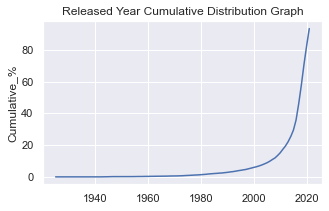

In [ ]:
#Converting Value Counts to DataFrame
df_year_count = pd.DataFrame(df["release_year"].value_counts().sort_index(ascending = False))
df_year_count.columns = ["Movie Count"]

sns.set(rc={"figure.figsize":(5, 3)}) #width=8, height=4

#Calculating the Cumulative % Share of Movie Count(CMF)
df_year_count["Cumulative Count"] = np.cumsum(df_year_count["Movie Count"])
df_year_count["Cumulative_%"] = df_year_count["Cumulative Count"] * 100 / sum(df_year_count["Movie Count"])

fig, ax = plt.subplots()

sns_data = df_year_count
#sns_data.head()
sns.lineplot(data = sns_data , x = sns_data.index, y = 100 - sns_data["Cumulative_%"], ax = ax).\
            set_title("Released Year Cumulative Distribution Graph")
plt.show()

We can see that more than 80% of movies present on Netlflix released between 2000 and 2020.

In [ ]:
df_year_count[df_year_count["Cumulative_%"] <= 60]

,Movie Count,Cumulative Count,Cumulative_%
2021,592,592,6.721926
2020,953,1545,17.542864
2019,1030,2575,29.238106
2018,1147,3722,42.261837
2017,1032,4754,53.979789


<b> Recommendation 1 : </b> It will beneficial that we upload movies on Netflix which release on or after 2018. Almost 50% of content released on Netflix is generated on or after 2018.

<b>Goal 2: </b> Comparison of TV Shows with Movie

In [ ]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Others,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Others,Others,Others,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


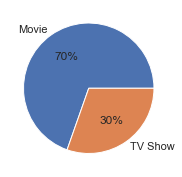

In [ ]:
split_type = df["type"].value_counts() / df.shape[0]

plt.pie(split_type, labels = split_type.index, autopct = "%.0f%%")
plt.show()

Share of Movies on Netflix is 70% which is pretty high as compared to TV shows (only 30%). Lets also see how this trend has changed across years.

For better analysis since most of the content on Netflix is released between 2000 and 2020, We would be taking the filter between 2000 and 2020 only.

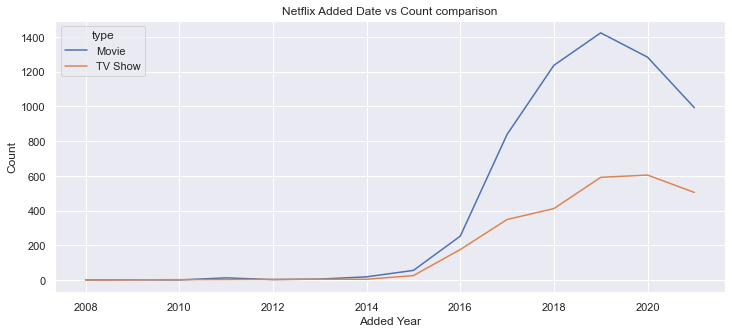

In [ ]:
#Comparison with Added Year
df_year_type = df.loc[:,['date_added', 'type']]
df_year_type.loc[:,'added_year'] = df.date_added.dt.year
df_year_type = df_year_type.groupby(by = ['type', 'added_year']).count().reset_index()

plt.figure(figsize = (12,5))
sns.lineplot(data = df_year_type,x = 'added_year' ,y = 'date_added',  hue = 'type')
plt.title("Netflix Added Date vs Count comparison")
plt.xlabel("Added Year")
plt.ylabel("Count")
plt.show()

We can observe the following trend:
1. Share of Movies on netflix is increasing till 2018 and then it is gradually decreasing
2. Share of TV Show on netflix is increasing till 2020

This trend can be following reasons:
1. In 2018, Netflix aquired most of Movies and after that it is trying to gain the full share of TV Shows from market.
2. Based on user engagement, Since the user is spending more time on TV Series as compared to movies Netflix has increased acquisition of TV Series as compared to Movie.

Because of lack of Customer Specific Data(Count of Customers, Avg Time spent on Netflix etc.) we will not be able to conclude that out of Movies and TV Shows which should be given preference.

<b> Conculsion :</b> Netflix is focussing more on TV Shows as compared on Movies in recent years.

<b> Goal 3 : </b> Best time to Launch a TV Show ?

Text(0.5, 1.0, 'Year Count of Netflix Shows')

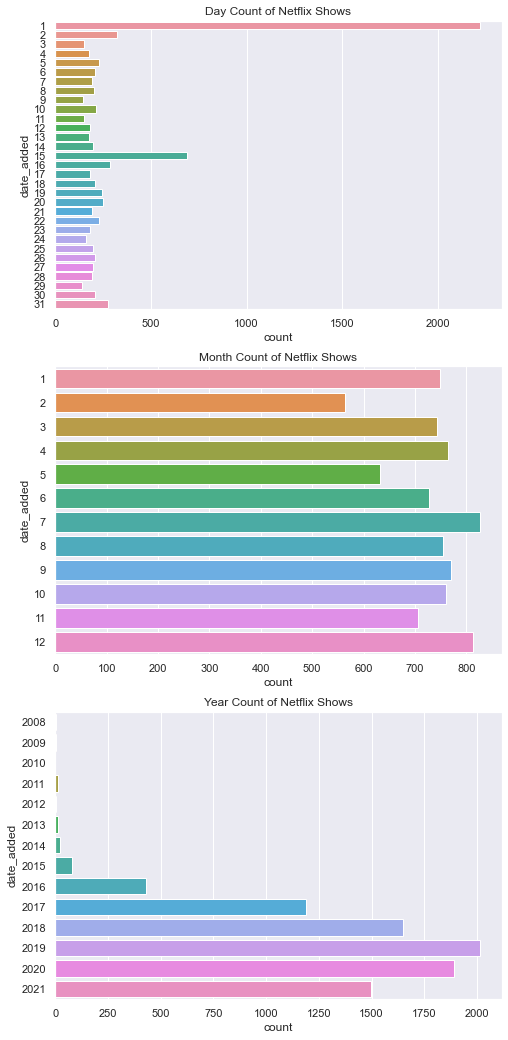

In [ ]:
#Number of dates can be very high, Limiting to last 1

fig, ax = plt.subplots(3,1, figsize = (8,18))
#define figure size
#sns.set(rc={"figure.figsize":(8, 18)}) #width=8, height=4

sns.countplot(data = df, y = df['date_added'].dt.day, ax = ax[0]).set_title("Day Count of Netflix Shows")
sns.countplot(data = df, y = df['date_added'].dt.month, ax = ax[1]).set_title("Month Count of Netflix Shows")
sns.countplot(data = df, y = df['date_added'].dt.year, ax = ax[2]).set_title("Year Count of Netflix Shows")

#sns.lineplot(x = df["date_added"].dt.year)

No clear conclusion can be found on the basis of Month and Year. 

<b>Recommendation 3 :</b> It is clearly evident from the above the graph that most of the movies and TV Shows are launched on 1st and 15th of every month. I think its best to launch on 1st and 15th of every month.

<b>Goal 4 : </b> Finding the optimal duration of the movies.

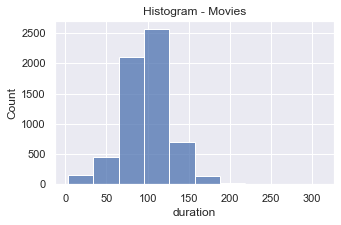

In [ ]:
plt.figure(figsize = (5,3))
sns.histplot(df[df.type == 'Movie'].duration, bins = 10).set_title("Histogram - Movies")
plt.show()

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


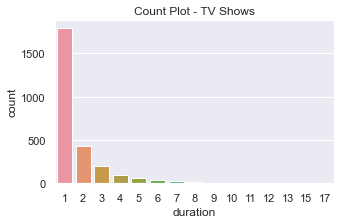

In [ ]:
plt.figure(figsize = (5,3))
sns.countplot(df[df.type == 'TV Show'].duration).set_title("Count Plot - TV Shows")
plt.show()

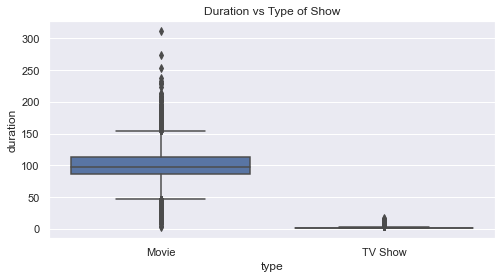

In [ ]:
#define figure size
sns.set(rc={"figure.figsize":(8, 4)}) #width=8, height=4

sns.boxplot(x = 'type', y = 'duration', data = df).set_title("Duration vs Type of Show")
plt.show()

<b>Movie :</b>We can observe many outliers in the Movie as compared to TV Shows suggesting some movies can be documentaries and they span a longer duration of time. 
This suggests that we need to further separate the duration with respect to <b>genre</b> and come with optimal duration for new movies.

<b>TV Show :</b>For the TV Shows, Its pretty obvious that we need to start with One season and then move to creating further seasons based on audience.

In [ ]:
#Exploding the dataset
df_exploded = df.copy()

#1. Coverting all the comma separated values into list
#2. Exploding the dataset
for c in ['listed_in','cast','country','director']:
    df_exploded[c] = df_exploded[c].str.split(",")
    df_exploded = df_exploded.explode(c)
    #Observing some whitespaces
    df_exploded[c] = df_exploded[c].str.strip()

    
df_exploded

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Others,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,TV Show,Blood & Water,Others,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,TV Show,Blood & Water,Others,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,TV Show,Blood & Water,Others,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...
8806,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...


<b>Goal 4 :</b> Finding the country specific trend

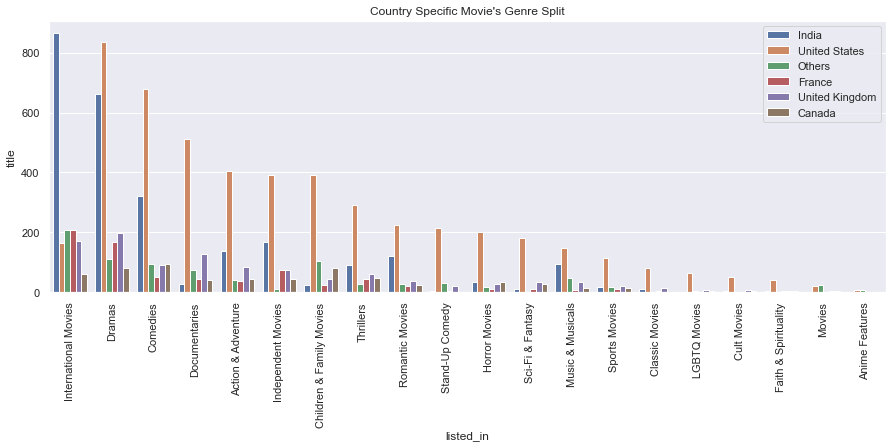

In [ ]:
#Grouping the data based on Country and Genre, So that we can have a better visibility around which content is viewed among
#different countries
df_exploded_movie = df_exploded[df_exploded['type'] == 'Movie']


grp_cntry = df_exploded_movie.groupby(by = ['country'])['title'].nunique().sort_values(ascending = False)
grp_cntry_genre = df_exploded_movie.groupby(by = ['country','listed_in'])['title'].nunique().sort_values(ascending = False)

#Taking Countries with highest count and consume more than 80% of the whole data
countries_to_analyze = grp_cntry[np.cumsum(grp_cntry)/sum(grp_cntry) < 0.70].index.tolist()

#Preparing the barplot for Country and ListedIn
grp_cntry_genre = grp_cntry_genre.reset_index()
grp_cntry_genre = grp_cntry_genre.loc[grp_cntry_genre["country"].isin(countries_to_analyze)]

sns.set(rc={"figure.figsize":(15, 5)}) #width=8, height=4

sns.barplot(x = 'listed_in', y = 'title', hue = 'country' ,data = grp_cntry_genre)
plt.xticks(rotation = 90)
plt.title("Country Specific Movie's Genre Split")
plt.legend(loc = "upper right",frameon = True)
plt.show()

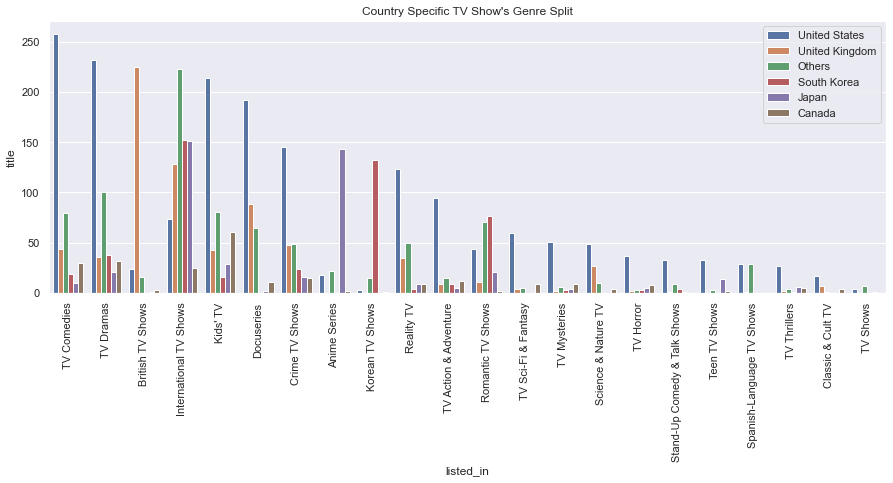

In [ ]:
#Grouping the data based on Country and Genre, So that we can have a better visibility around which content is viewed among
#different countries
df_exploded_movie = df_exploded[df_exploded['type'] == 'TV Show']


grp_cntry = df_exploded_movie.groupby(by = ['country'])['title'].nunique().sort_values(ascending = False)
grp_cntry_genre = df_exploded_movie.groupby(by = ['country','listed_in'])['title'].nunique().sort_values(ascending = False)

#Taking Countries with highest count and consume more than 80% of the whole data
countries_to_analyze = grp_cntry[np.cumsum(grp_cntry)/sum(grp_cntry) < 0.70].index.tolist()

#Preparing the barplot for Country and ListedIn
grp_cntry_genre = grp_cntry_genre.reset_index()
grp_cntry_genre = grp_cntry_genre.loc[grp_cntry_genre["country"].isin(countries_to_analyze)]

sns.set(rc={"figure.figsize":(15, 5)}) #width=8, height=4

sns.barplot(x = 'listed_in', y = 'title', hue = 'country' ,data = grp_cntry_genre)
plt.xticks(rotation = 90)
plt.title("Country Specific TV Show's Genre Split")
plt.legend(loc = "upper right",frameon = True)
plt.show()

<b>Movie Recommendations: </b>
1. Best place to launch movie is USA because of most genre in USA substanially high as compared to most countries.
2. In Countires like India, Choice of genre should be International Movies, Dramas, Comedy.

<b>TV Shows Recommendations: </b>

1. Best place to launch TV Show is USA because of most genre in USA substanially high as compared to most countries.
2. Some country specific trends can be seen in graphs. For example: 
    1. Anime series are mostly popular in Japan
    2. Korean TV Shows and Romantic TV Shows are mostly popular in South Korea
    3. British TV Shows are mostly popular in UK


<b>Goal 5: </b>Analysis on Actors and Directors:

Since there were many unknowns in director and cast, Changing that to mode inside the country

In [ ]:
def replace_with_mods(df, from_column, to_column, default_value):
    for i in df[from_column].unique():
        #Finding the mode
        current_mode = df.loc[(df[from_column] == i) & (df[to_column] != default_value), to_column].mode()

        #Finding the current value
        current_value = current_mode[0] if current_mode.shape[0] != 0 else default_value
        #print("Country:",i,"Current Value:",current_value)
        
        #Replacing with the mode in the director
        df.loc[(df[from_column] == i) & (df[to_column] == default_value),to_column] = current_value
    return df


In [ ]:
#Replacing Director with Mode within Country
df_exploded = replace_with_mods(df_exploded, 'country', 'director', 'Others')

#Replacing Cast with Mode within Directors
df_exploded = replace_with_mods(df_exploded, 'country', 'cast', 'Others')

director
Martin Scorsese            952
Hidenori Inoue             416
Sarah Smith                268
Toshiya Shinohara          195
Bong Joon Ho               169
                          ... 
Judah Friedlander            1
Jude Okwudiafor Johnson      1
Jude Weng                    1
Julia Hart                   1
Mat Whitecross               1
Name: title, Length: 4994, dtype: int64


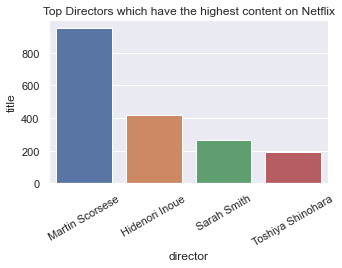

In [ ]:
#Question 1 - Who are the most popular director in the world (Netflix) ?

director_values = df_exploded.groupby(by = ['director'])['title'].nunique().sort_values(ascending = False)

directors_to_analyze = director_values[(np.cumsum(director_values) / sum(director_values)) < 0.20]
print(director_values)
plt.figure(figsize = (5,3))
sns.barplot(x = directors_to_analyze.index , y =  directors_to_analyze)
plt.title("Top Directors which have the highest content on Netflix")
plt.xticks(rotation = 30)
plt.show()

Percentile 75th 1.0
Percentile 25th 1.0
Percentile 50th 1.0
Percentile 90th 2.0
Percentile 99th 12.0


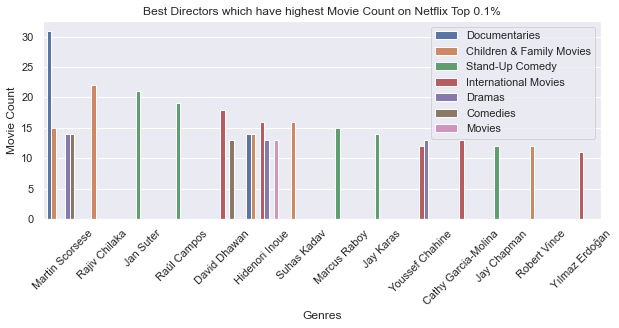

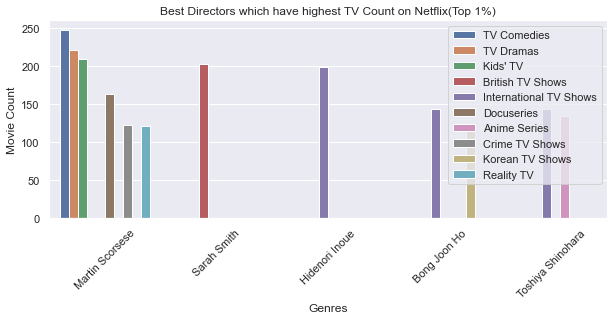

In [ ]:
director_genre_grp = df_exploded.groupby(by=['director','listed_in','type'])['title'].nunique().reset_index()
director_genre_grp.sort_values(by = ['title'], ascending = False)


#Most Popular Directors for genre
percentile_75 = np.quantile(director_genre_grp['title'],0.75)
percentile_25 = np.quantile(director_genre_grp['title'],0.25)
percentile_50 = np.quantile(director_genre_grp['title'],0.50)
percentile_90 = np.quantile(director_genre_grp['title'],0.90)
percentile_99 = np.quantile(director_genre_grp['title'],0.99)

print("Percentile 75th",percentile_75)
print("Percentile 25th",percentile_25)
print("Percentile 50th",percentile_50)
print("Percentile 90th",percentile_90)
print("Percentile 99th",percentile_99)

#For Movie Percentile 99
percentile_99_movie = np.quantile(director_genre_grp.loc[director_genre_grp['type'] == 'Movie','title'],0.998)
percentile_99_tvshow = np.quantile(director_genre_grp.loc[director_genre_grp['type'] == 'TV Show','title'],0.99)


#Filtering for directors and genres in top 0.1% of Netlix content
input_direct_genre_grp_movie = director_genre_grp[(director_genre_grp.title > percentile_99_movie) & (director_genre_grp.type == 'Movie')]\
                                                  .sort_values(by = 'title', ascending = False)

plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
sns.barplot(y = 'title', x = 'director', hue = 'listed_in', data = input_direct_genre_grp_movie)
plt.xlabel("Genres")
plt.ylabel("Movie Count")
plt.xticks(rotation = 45)
plt.title("Best Directors which have highest Movie Count on Netflix Top 0.1%")
plt.legend(loc = "upper right",frameon = True)


#Filtering for directors and genres in top 1% of Netlix content
input_direct_genre_grp_tvshow = director_genre_grp[(director_genre_grp.title > percentile_99_tvshow) & (director_genre_grp.type == 'TV Show')]\
                                                  .sort_values(by = 'title', ascending = False)

plt.figure(figsize = (10,8))
plt.subplot(2,1,2)
sns.barplot(y = 'title', x = 'director', hue = 'listed_in', data = input_direct_genre_grp_tvshow)
plt.xlabel("Genres")
plt.ylabel("Movie Count")
plt.xticks(rotation = 45)
plt.title("Best Directors which have highest TV Count on Netflix(Top 1%)")
plt.legend(loc = "upper right",frameon = True)

plt.show()

<b>Best directors for top genres: </b>
1. Movie:
    1. Childern & Family Movies : Martin Scorsese Seems to have strong hold here. Top Most movies of this genre is Netflix is prepared by him
    2. Documentaries : Marcus Raboy, For any documentaries content this director is in a best suited position to handle this
    3. International Movies : David Dhawan has the highest content for this genre
2. TV Show:
    1. Marcus Raboy is the director having the highest content on Netflix irrespective of Movie and TV Show.
    3. British TV Shows : Only person in top 1% of Netflix with this genre is Sarah Smith.

Similarly there are many other insights for other directors too that can be inferred from above graphs.


<b> Goal 6: </b>Finding out if there is any relationship between Date_Added, Release Year ,Duration and Movie Count

In [ ]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Others,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Others,Others,Others,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<AxesSubplot:>

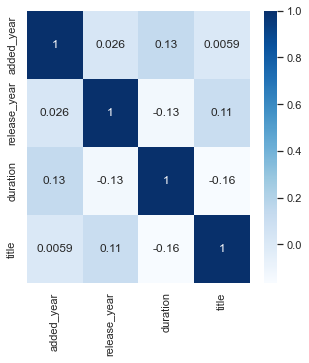

In [ ]:
df_grp_by = df.loc[:,['date_added','release_year','duration','title']]
df_grp_by.loc[:,'added_year'] = df_grp_by.date_added.dt.year
df_grp_by = df_grp_by.groupby(by = ['added_year', 'release_year', 'duration'])['title'].count().reset_index()

#Heatmap
plt.figure(figsize = (5,5))
sns.heatmap(df_grp_by.corr(), annot = True, cmap = 'Blues')


<b>Inferences from above graph:</b>
There is no high correlation between added_year, released_year, duration and movie_count. This closes off the assumptions that if the duration of the movie is too high, it doesnt mean that count of the movies would be very less.

<b>Goal 7:</b> Finding out the ratings required in top countries for Netflix

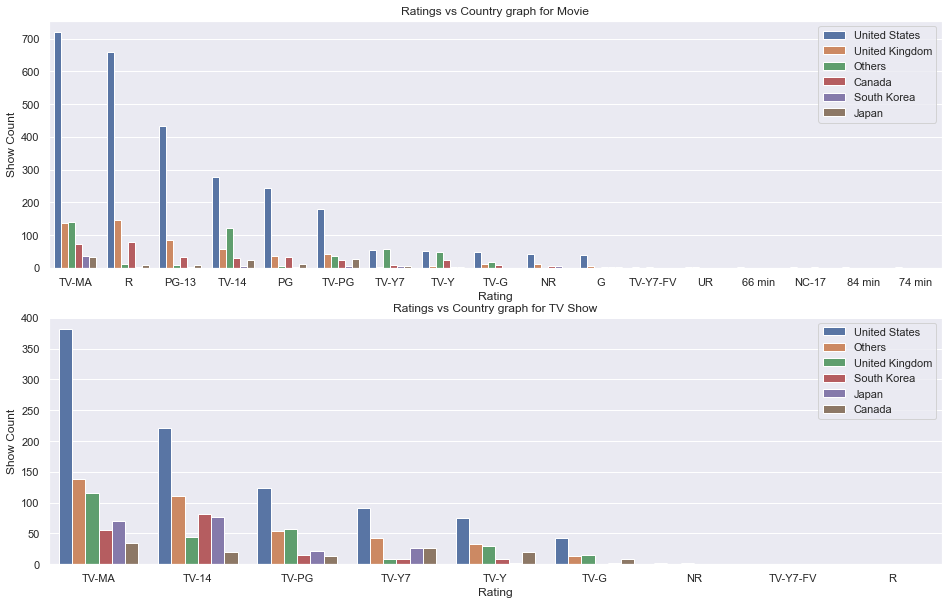

In [ ]:
df_grp_dir_act = df_exploded.groupby(by = ['rating','country','type'])['title'].nunique().sort_values(ascending = False).reset_index()

#Taking Country Filter - Picking the countries which make upto 70% of the total dataset
df_grp_dir_act = df_grp_dir_act[df_grp_dir_act['country'].isin(countries_to_analyze)]

fig, ax = plt.subplots(2,1,figsize = (16,10))

cnt = 0
for typ in  df_grp_dir_act['type'].unique():
    df_temp = df_grp_dir_act.loc[df_grp_dir_act['type'] == typ , :]
#     df_temp = df_temp[((np.cumsum(df_temp['title'])/ sum(df_temp['title'])) < 0.01)]
#     print(df_temp.shape)
    sns.barplot(x = 'rating', y = 'title', hue = 'country', data = df_temp, ax = ax[cnt])
    ax[cnt].set_xlabel("Rating")
    ax[cnt].set_ylabel("Show Count")
    ax[cnt].set_title("Ratings vs Country graph for "+typ)
    ax[cnt].legend(loc = 'upper right')
    cnt += 1


<b>Recommendation: </b>
For both Movie and TV Show "TV-MA" seems the major rating in the movie, So for the new content Netflix should try to keep the rating onto "TV-*" levels only.